# How to Develop Stacked LSTM

In [55]:
import random as rd
import numpy as np
import matplotlib.pyplot as plt
import math as math

from keras.models import Sequential
from keras.layers import LSTM, Dense


In [63]:
# generate damped sine wave in [0,1]
def generate_sequence(length, period, decay):
    return [0.5 + 0.5 * math.sin(2 * math.pi * i / period) * math.exp(-decay * i) for i in range(length)]


In [64]:
# generate input and output pairs of damped sine waves
def generate_examples(length, n_patterns, output):
    X, y = list(), list()
    for _ in range(n_patterns):
        p = rd.randint(10, 20)
        d = rd.uniform(0.01, 0.1)
        sequence = generate_sequence(length + output, p, d)
        X.append(sequence[:-output])
        y.append(sequence[-output:])
    X = np.array(X).reshape(n_patterns, length, 1)
    y = np.array(y).reshape(n_patterns, output)
    return X, y


In [65]:
# configure problem
length = 50
output = 5

In [66]:
# define model
model = Sequential()
model.add(LSTM(20, return_sequences=True, input_shape=(length, 1)))
model.add(LSTM(20))
model.add(Dense(output))
model.compile(loss= 'mae' , optimizer= 'adam' )
print(model.summary())


Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_19 (LSTM)               (None, 50, 20)            1760      
_________________________________________________________________
lstm_20 (LSTM)               (None, 20)                3280      
_________________________________________________________________
dense_9 (Dense)              (None, 5)                 105       
Total params: 5,145
Trainable params: 5,145
Non-trainable params: 0
_________________________________________________________________
None


In [68]:
# fit model
X, y = generate_examples(length, 10000, output)
history = model.fit(X, y, batch_size=10, epochs=1)


Epoch 1/1
10000/10000 [==============================] - 32s 3ms/step - loss: 0.0443


In [69]:
# evaluate model
X, y = generate_examples(length, 1000, output)
loss = model.evaluate(X, y, verbose=0)
print('MAE: %f' % loss)

MAE: 0.041766


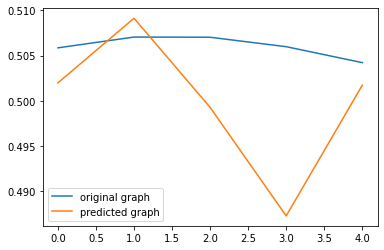

In [74]:
# prediction on new data
X, y = generate_examples(length, 1, output)
yhat = model.predict(X, verbose=0)
plt.plot(y[0], label= 'original graph' )
plt.plot(yhat[0], label= 'predicted graph' )
plt.legend()
plt.show()